#### This files describes the usage of the functions that implement the method for estimating the sensitivity for differentiation between models, described in arXiv:2312.00659

A model is parametrized by a 1D array of effective branching ratios ```branchings:np.ndarray``` into different selected final states. 

Most of the functions require specifying 
- ```branchings_real``` for the true model
- ```branchings_test``` for the tested model
- ```backgrounds``` for the array of the expected number of background events in each channel (default is zero)

These can be provided directly as arguments, or can be stored in a .txt/.csv file in the format described below.

| br1  | br2  | bkg  | eff  | channel_names |
|------|------|------|------|--------------|
| 0.25 | 0.30 | 100 | 0.90 | ee |
| 0.50 | 0.55 | 40 | 0.95 | mumu |
| 0.75 | 0.80 | 50 | 0.92 | tautau |
| 0.10 | 0.15 | 70 | 0.88 | qq |

Here, ```branchings_real(tested) = br1(2) * eff```, ```backgrounds``` = ```bkg```. The columns bkg, eff are optional. If not provided, the default values are 0, 1. The column channel_names is optional, and is used only for plotting.




Import modules

In [3]:
import modeltesting as mt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### ```compare_two_models```

The function creates ```Nsamples``` realizations of the experimental data based on the real model and computes the probability that the tested model is rejected at the level ```CL```. 

The function takes 
- the expected number of events ```N_real```
- two arrays of the effective branchings ratios: ```branchings_real``` and ```branchings_tested```, 
- the array of expected backgrounds ```backgrounds``` (if not specified, the background is assumed to be zero).

The function returns a tuple 
```(p, N_tested)```
with the probability ```p``` that the tested model is rejected  and the average expected best-fit number of events ```N_tested``` for the tested model.

```
compare_two_models(
    N_real:float, 
    branchings_real:np.ndarray, 
    branchings_tested:np.ndarray, 
    backgrounds = None, 
    CL = 0.9, 
    Nsamples = 100000
)
compare_two_models(
    N_real:float,
    path: str, # path to the file
    CL = 0.9, 
    Nsamples = 100000
)

In [12]:
N_real = 400
branchings_real = np.array([0.4, 0.3, 0.2])
branchings_tested = np.array([0.35, 0.35, 0.15])
backgrounds = np.array([100, 200, 150])
Nsamples = 100000


exclusion_probability, N_tested = mt.compare_two_models(
    N_real = N_real, 
    branchings_real = branchings_real, 
    branchings_tested = branchings_tested,
    backgrounds= backgrounds,
    Nsamples= Nsamples
)
print("Exclusion probability:", exclusion_probability)
print("Expected N_tested:", N_tested)

Exclusion probability: 0.40678
Expected N_tested: 421.6166728999425


Visualize the results of the comparison of two models. Requires ```matplotlib``` installed 

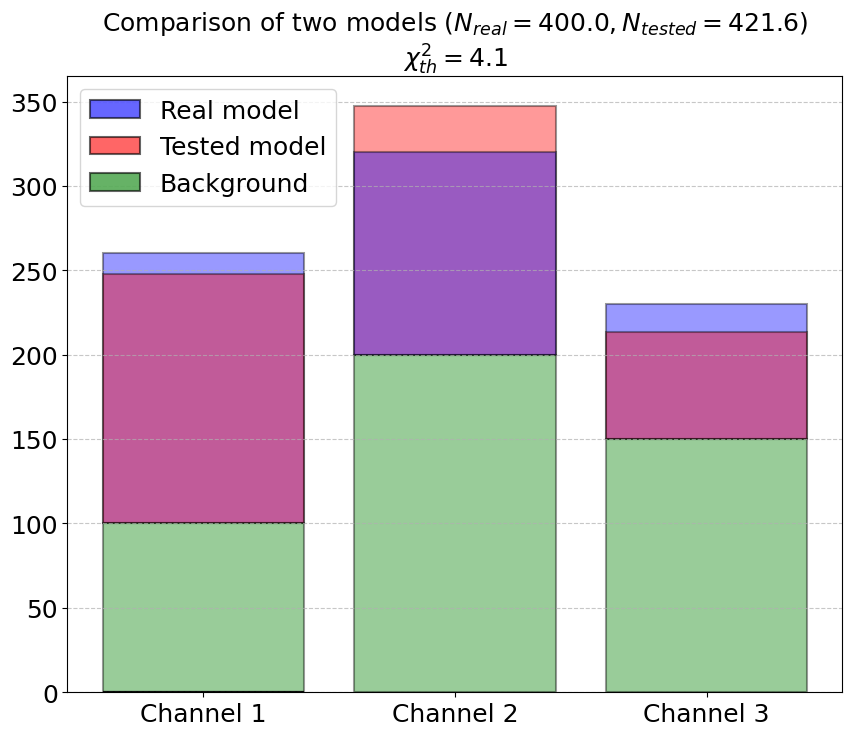

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
mt.barplot(ax, 
           N_real = N_real,
           N_tested = N_tested,
           branchings_real = branchings_real, 
           branchings_tested = branchings_tested, 
           backgrounds = backgrounds,
           channel_names = ["Channel 1", "Channel 2", "Channel 3"]
)

#### ```find_optimal_N_real```

The function estimates the number of events ```N_real``` for which the probability that the tested model is rejected at the level ```CL``` is ```exclusion_probability```.

Returns a tuple (N_real, N_tested, p) with the estimated number of events ```N_real```, the average expected best-fit number of events ```N_tested``` for the tested model, and the probability ```p``` that the tested model is rejected.

```
find_optimal_N_real(
    branchings_real: np.ndarray, 
    branchings_tested = np.ndarray,    
    backgrounds = None,
    exclusion_probability = 0.9, 
    CL = 0.9, 
    Nsamples = 100000, 
    convergence_rate = 1.
)
find_optimal_N_real(
    path = None,
    exclusion_probability = 0.9, 
    CL = 0.9, 
    Nsamples = 100000, 
    convergence_rate = 1.
)

In [25]:
branchings_real = np.array([0.4, 0.3, 0.2])
branchings_tested = np.array([0.35, 0.35, 0.15])
backgrounds = np.array([100, 200, 150])
Nsamples = 100000

N_real, N_tested, exclusion_probability = mt.find_optimal_N_real(
    branchings_real = branchings_real, 
    branchings_tested = branchings_tested,
    backgrounds= backgrounds,
    Nsamples= Nsamples,
)
print("The required number of events:", N_real)
print("The expected number of events in the tested model:", N_tested)
print("Achieved exclusion probability:", exclusion_probability)
    

The required number of events: 836.591998018865
The expected number of events in the tested model: 895.9936220822966
Achieved exclusion probability: 0.89364


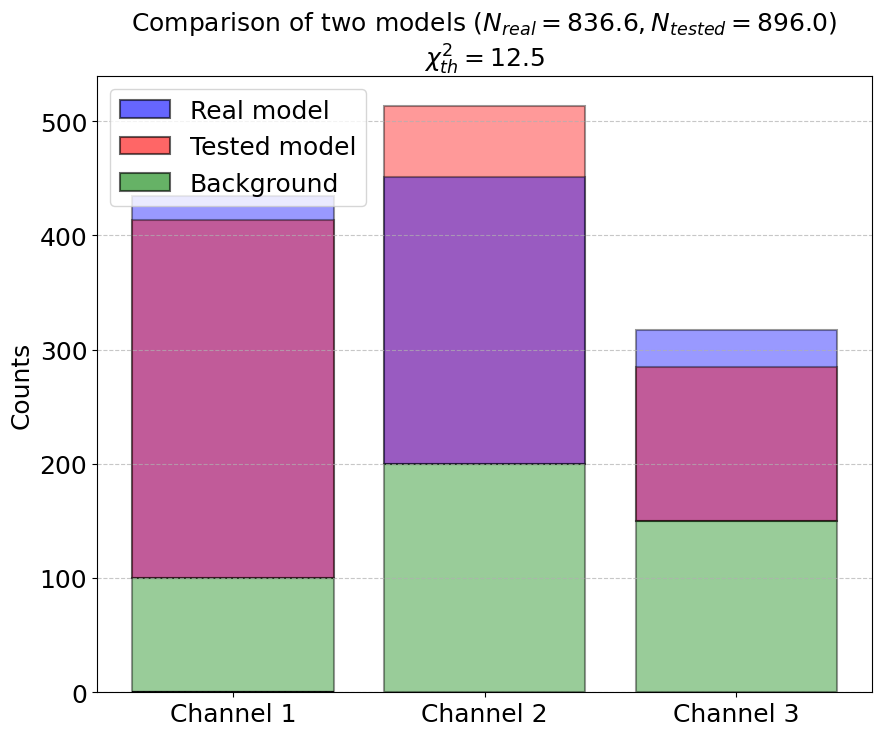

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
mt.barplot(ax, 
           N_real = N_real,
           N_tested = N_tested,
           branchings_real = branchings_real, 
           branchings_tested = branchings_tested, 
           backgrounds = backgrounds,
           channel_names = ["Channel 1", "Channel 2", "Channel 3"]
)